In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


coordinates = list(lat_lngs)

from citipy import citipy



In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [4]:
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
#Create an empty list to hold the weather data
city_data= []
#Print the beginning of the logginh
print("Beggining Data Retrieval.       ")
print("--------------------------------")

#Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beggining Data Retrieval.       
--------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | sierpc
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | moroni
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | fort nelson
Processing Record 12 of Set 1 | goderich
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | merauke
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | vao
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record

Processing Record 36 of Set 4 | pangnirtung
Processing Record 37 of Set 4 | saint anthony
Processing Record 38 of Set 4 | moyale
Processing Record 39 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | douglas
Processing Record 42 of Set 4 | fuzhou
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | emba
Processing Record 46 of Set 4 | yeehaw junction
City not found. Skipping...
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | stolbishche
Processing Record 49 of Set 4 | nirmal
Processing Record 50 of Set 4 | aurillac
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | correia pinto
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | izhma
Processing Record 6 of Set 5 | samusu
City not found. Sk

Processing Record 22 of Set 8 | balkhash
Processing Record 23 of Set 8 | asau
Processing Record 24 of Set 8 | mweka
Processing Record 25 of Set 8 | sexsmith
Processing Record 26 of Set 8 | antipolo
Processing Record 27 of Set 8 | lolua
City not found. Skipping...
Processing Record 28 of Set 8 | itacoatiara
Processing Record 29 of Set 8 | north bend
Processing Record 30 of Set 8 | ancud
Processing Record 31 of Set 8 | pangkalanbuun
Processing Record 32 of Set 8 | padra
Processing Record 33 of Set 8 | oranjemund
Processing Record 34 of Set 8 | sechura
Processing Record 35 of Set 8 | port lincoln
Processing Record 36 of Set 8 | vadso
Processing Record 37 of Set 8 | korla
Processing Record 38 of Set 8 | mabaruma
Processing Record 39 of Set 8 | caraballeda
Processing Record 40 of Set 8 | altay
Processing Record 41 of Set 8 | north myrtle beach
Processing Record 42 of Set 8 | miramar
Processing Record 43 of Set 8 | wajima
Processing Record 44 of Set 8 | belmonte
Processing Record 45 of Set 8

City not found. Skipping...
Processing Record 13 of Set 12 | cherskiy
Processing Record 14 of Set 12 | nhulunbuy
Processing Record 15 of Set 12 | hashtgerd
Processing Record 16 of Set 12 | herat
Processing Record 17 of Set 12 | iralaya
Processing Record 18 of Set 12 | svetlogorsk
Processing Record 19 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 20 of Set 12 | dawlatabad
Processing Record 21 of Set 12 | coihaique
Processing Record 22 of Set 12 | otacilio costa
Processing Record 23 of Set 12 | lobez
Processing Record 24 of Set 12 | biasca
Processing Record 25 of Set 12 | rognan
Processing Record 26 of Set 12 | tsabong
Processing Record 27 of Set 12 | kulhudhuffushi
Processing Record 28 of Set 12 | sao jose da coroa grande
Processing Record 29 of Set 12 | nizhneivkino
Processing Record 30 of Set 12 | amursk
Processing Record 31 of Set 12 | vila franca do campo
Processing Record 32 of Set 12 | gasa
Processing Record 33 of Set 12 | manta
Processing Record 34 of Set 12 |

In [6]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.86,75,12,21.21,PF,2022-03-05 20:38:26
1,Klaksvik,62.2266,-6.5890,43.72,80,23,13.31,FO,2022-03-05 20:38:26
2,Sierpc,52.8568,19.6691,30.94,59,6,1.32,PL,2022-03-05 20:38:27
3,Touros,-5.1989,-35.4608,83.30,79,96,9.84,BR,2022-03-05 20:38:27
4,Moroni,-11.7022,43.2551,78.49,83,100,1.45,KM,2022-03-05 20:38:28
5,Rawson,-43.3002,-65.1023,70.38,26,30,18.03,AR,2022-03-05 20:37:53
6,Ilulissat,69.2167,-51.1000,35.62,35,75,18.41,GL,2022-03-05 20:38:28
7,Yellowknife,62.4560,-114.3525,23.41,74,20,3.44,CA,2022-03-05 20:38:29
8,Lavrentiya,65.5833,-171.0000,11.39,93,100,2.53,RU,2022-03-05 20:38:29
9,Fort Nelson,58.8053,-122.7002,26.19,63,0,5.75,CA,2022-03-05 20:38:30


In [7]:
column_name = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [column_name]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-03-05 20:38:26,-23.1203,-134.9692,79.86,75,12,21.21
1,Klaksvik,FO,2022-03-05 20:38:26,62.2266,-6.5890,43.72,80,23,13.31
2,Sierpc,PL,2022-03-05 20:38:27,52.8568,19.6691,30.94,59,6,1.32
3,Touros,BR,2022-03-05 20:38:27,-5.1989,-35.4608,83.30,79,96,9.84
4,Moroni,KM,2022-03-05 20:38:28,-11.7022,43.2551,78.49,83,100,1.45
...,...,...,...,...,...,...,...,...,...
564,Antofagasta,CL,2022-03-05 20:54:55,-23.6500,-70.4000,70.88,77,85,7.74
565,Khandagayty,RU,2022-03-05 20:54:56,50.7333,92.0500,-3.37,97,82,5.30
566,Yarim,YE,2022-03-05 20:54:56,14.2980,44.3779,53.96,42,66,1.05
567,Kandrian,PG,2022-03-05 20:54:57,-6.2167,149.5500,78.40,87,100,6.15


In [8]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
lngs = city_data_df["Lng"]


In [10]:
today = time.strftime("%x")
today

'03/05/22'

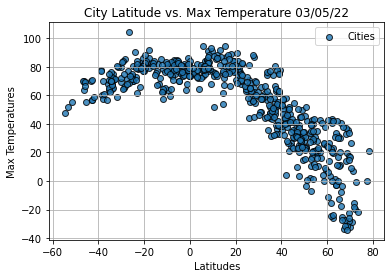

In [11]:
plt.scatter(lats, max_temps, edgecolor ="black", marker = "o", alpha=0.8, label="Cities")
plt.grid()
plt.legend()

plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Max Temperatures")
plt.savefig("weather_data/Fig.png")
plt.show()

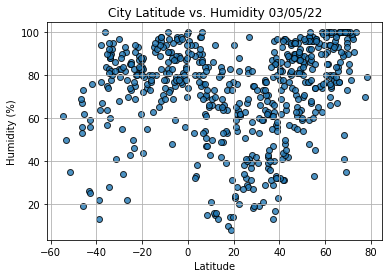

In [12]:
plt.scatter(lats, humidity, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


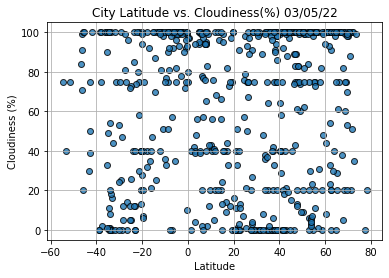

In [13]:
plt.scatter(lats, cloudiness, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

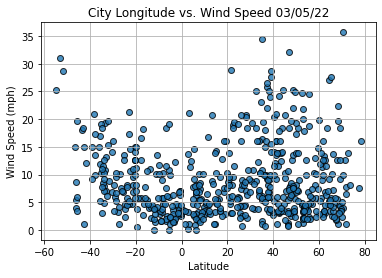

In [14]:
plt.scatter(lats, wind_speed, alpha = 0.8, edgecolor = "black", label="Cities", marker = "o")

plt.title(f"City Longitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

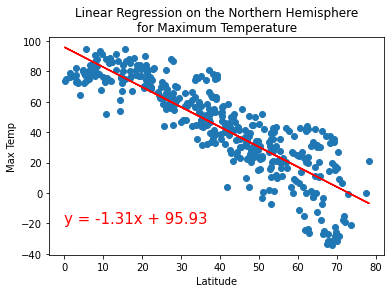

In [17]:


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'
                        '\nfor Maximum Temperature', 'Max Temp',(0,-20))


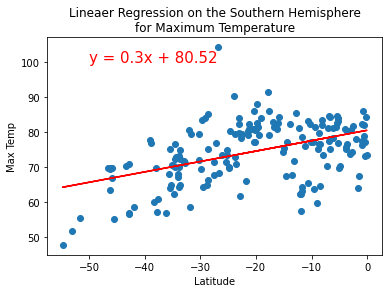

In [18]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Lineaer Regression on the Southern Hemisphere'
                                            '\nfor Maximum Temperature', 'Max Temp', (-50, 100))

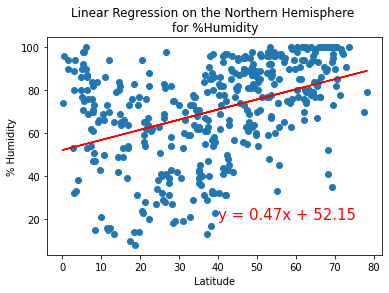

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n" 
                       'for %Humidity', '% Humidity', (40,20))

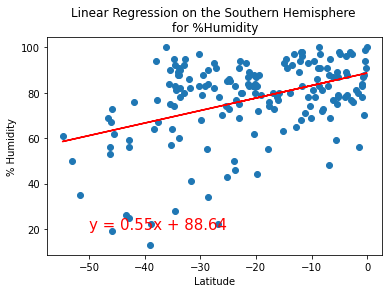

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n" 
                       'for %Humidity', '% Humidity', (-50,20))

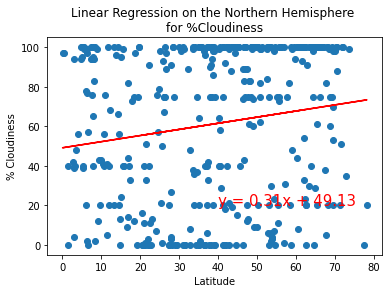

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n" 
                       'for %Cloudiness', '% Cloudiness', (40,20))

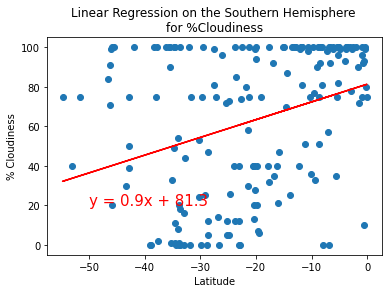

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n" 
                       'for %Cloudiness', '% Cloudiness', (-50,20))

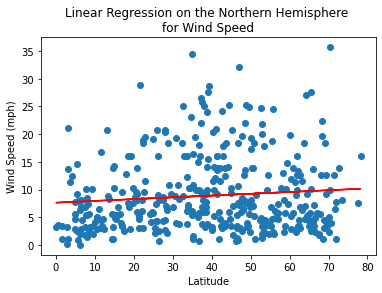

In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n" 
                       'for Wind Speed', 'Wind Speed (mph)', (40,40))

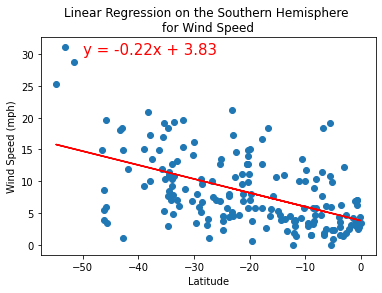

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n" 
                       'for Wind Speed', 'Wind Speed (mph)', (-50,30))